<a href="https://colab.research.google.com/github/sruthi-v04/MIRnet_bigimage/blob/main/MIRNET_smallPicture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from huggingface_hub import from_pretrained_keras
import keras
from PIL import Image


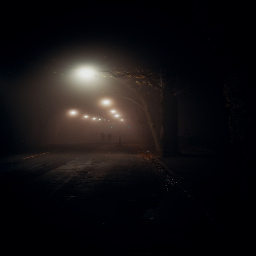

In [2]:
from google.colab.patches import cv2_imshow
import cv2

# Load your image
image_path = "/content/lowlight_small.jpg"
original_image = cv2.imread(image_path)

# Resize the image to 256x256 pixels
target_size = (256, 256)
resized_image = cv2.resize(original_image, target_size)

# Convert the image to float32 and normalize pixel values
input_image = resized_image.astype('float32') / 255.0

# Display the resized image
cv2_imshow(resized_image)


In [3]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

demo.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

model.png:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

(…)fevents.1645063719.e472ca747184.299.0.v2:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

(…)fevents.1645063841.e472ca747184.299.1.v2:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

(…)fevents.1645062781.9310af7fd322.357.0.v2:   0%|          | 0.00/481k [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/219k [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/437M [00:00<?, ?B/s]

In [4]:
image = keras.preprocessing.image.img_to_array(resized_image)

In [5]:
image.shape

(256, 256, 3)

In [6]:
image = image.astype('float32') / 255.0

In [7]:
image.shape

(256, 256, 3)

In [8]:
image = np.expand_dims(image, axis = 0)

In [9]:
image.shape

(1, 256, 256, 3)

In [10]:
output = model.predict(image)

1/1 [==============================] - 25s 25s/step


In [11]:
output_image = output[0] * 255.0

In [12]:
output_image.shape

(256, 256, 3)

In [13]:
output_image = output_image.clip(0,255)

In [14]:
output_image.shape

(256, 256, 3)

In [15]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [16]:
output_image

array([[[43.21902 , 40.81091 , 32.93588 ],
        [53.62049 , 50.684437, 45.885277],
        [50.218227, 56.978416, 47.617847],
        ...,
        [53.08928 , 55.81601 , 45.287197],
        [53.25983 , 51.697285, 42.502003],
        [39.19541 , 34.800564, 33.736546]],

       [[50.05404 , 41.85371 , 44.771328],
        [66.287834, 50.623077, 51.846867],
        [57.90475 , 52.30849 , 45.718807],
        ...,
        [55.98419 , 51.72673 , 42.099003],
        [61.467354, 54.336765, 47.042248],
        [52.28096 , 44.745296, 41.65266 ]],

       [[49.88939 , 38.021   , 40.915733],
        [65.23394 , 46.61527 , 44.821747],
        [53.19418 , 43.337856, 38.20003 ],
        ...,
        [48.923702, 39.71307 , 37.736366],
        [57.066807, 44.795094, 46.387966],
        [52.069984, 44.944553, 43.094532]],

       ...,

       [[50.248764, 45.18384 , 37.076973],
        [64.31728 , 51.771442, 38.05817 ],
        [55.26933 , 47.367855, 32.55224 ],
        ...,
        [50.23438 , 36.007

In [17]:
output_image = np.uint32(output_image)

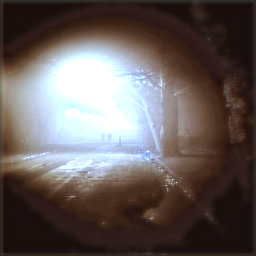

In [18]:
Image.fromarray(output_image.astype('uint8'),'RGB')